In [ ]:
# default_exp complete_protquant_pipeline

# Protein intensity estimation

Derive protein intensity profiles from quantitative peptide data by 1) normalizing out sample-specific biases 2) normalizing out peptide-specific ionization factors and 3) taking a median estimate.

In [ ]:
import glob
import os
import alphapept.io
import pandas as pd


def load_ap(AP_folder):
    raw_list = glob.glob(os.path.join(AP_folder,"*.ms_data.hdf"))
    df_list = []
    
    for i,raw in enumerate(raw_list):
        ap_full_df = alphapept.io.MS_Data_File(raw).read(dataset_name='protein_fdr')
        ap_full_df = ap_full_df[ap_full_df['rank']==1]
        ap_df = ap_full_df[['int_sum', 'protein', 'precursor']]
        ap_df = ap_df[ap_df['int_sum'] != 0]
        name = os.path.basename(raw).replace("PXD006109_", "").replace(".ms_data.hdf", "")
        ap_df[ 'shortname'] = name
        df_list.append(ap_df)
    ap_df = pd.concat(df_list)
    return ap_df

ap_df = load_ap("/Users/constantin/workspace/alphapept/temp")



In [ ]:
#export
import pandas as pd
import numpy as np
from nose.core import run
def run_protein_normalization(input_df):
    input_df = input_df.groupby(['protein','precursor','shortname'])['int_sum'].sum().unstack()
    input_df = input_df.replace(0, np.nan)
    input_df = np.log2(input_df)
    input_df = input_df.add_suffix("_A_LFQ")
    betweencond_normed = pd.DataFrame(normalize_withincond(input_df.to_numpy().T).T, index = input_df.index, columns= input_df.columns)
    protnormed_df, ionnormed_df = estimate_protein_intensities(betweencond_normed)
    return protnormed_df, ionnormed_df

prot_df = run_protein_normalization(ap_df)[0]
display(prot_df)

prot 0 of 7162
prot 100 of 7162
prot 200 of 7162
prot 300 of 7162
prot 400 of 7162
prot 500 of 7162
prot 600 of 7162
prot 700 of 7162
prot 800 of 7162
prot 900 of 7162
prot 1000 of 7162
prot 1100 of 7162
prot 1200 of 7162
prot 1300 of 7162
prot 1400 of 7162
prot 1500 of 7162
prot 1600 of 7162
prot 1700 of 7162
prot 1800 of 7162
prot 1900 of 7162
prot 2000 of 7162
prot 2100 of 7162
prot 2200 of 7162
prot 2300 of 7162
prot 2400 of 7162
prot 2500 of 7162
prot 2600 of 7162
prot 2700 of 7162
prot 2800 of 7162
prot 2900 of 7162
prot 3000 of 7162
prot 3100 of 7162
prot 3200 of 7162
prot 3300 of 7162
prot 3400 of 7162
prot 3500 of 7162
prot 3600 of 7162
prot 3700 of 7162
prot 3800 of 7162
prot 3900 of 7162
prot 4000 of 7162
prot 4100 of 7162
prot 4200 of 7162
prot 4300 of 7162
prot 4400 of 7162
prot 4500 of 7162
prot 4600 of 7162
prot 4700 of 7162
prot 4800 of 7162
prot 4900 of 7162
prot 5000 of 7162
prot 5100 of 7162
prot 5200 of 7162
prot 5300 of 7162
prot 5400 of 7162
prot 5500 of 7162
prot

shortname,HeLa12_1_A_LFQ,HeLa12_2_A_LFQ,HeLa12_3_A_LFQ,HeLa2_1_A_LFQ,HeLa2_2_A_LFQ,HeLa2_3_A_LFQ
protein,,,,,,
ENSEMBL:ENSBTAP00000001528,2.096152e+07,0.000000e+00,5.225691e+07,0.000000e+00,5.536702e+07,0.000000e+00
ENSEMBL:ENSBTAP00000007350,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.212421e+09
ENSEMBL:ENSBTAP00000025008,0.000000e+00,1.440609e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ENSEMBL:ENSBTAP00000032840,2.131318e+09,2.108283e+09,2.156242e+09,1.938600e+09,2.151305e+09,2.240657e+09
ENSEMBL:ENSBTAP00000034412,9.111441e+07,0.000000e+00,8.364863e+07,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...
sp|Q9Y6W3|CAN7_HUMAN,2.289182e+08,2.240172e+08,1.345839e+08,3.490809e+08,0.000000e+00,1.922716e+08
sp|Q9Y6W5|WASF2_HUMAN,0.000000e+00,2.942600e+08,2.080248e+08,0.000000e+00,8.081797e+07,1.659973e+08
sp|Q9Y6X9|MORC2_HUMAN,2.203090e+07,0.000000e+00,7.140202e+07,1.371370e+09,5.309540e+07,3.534304e+07


Species=Human, n=4037, median=-0.013417626038979323, dev=1.3353352646949104
species=Ecoli, n=0, median=nan, dev=nan


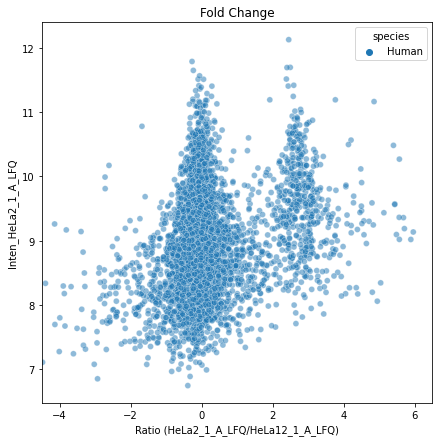

In [ ]:
import ms_empire.visualizations as vis

plot_df = prot_df.reset_index()
plot_df['species'] = 'Human'
vis.plot_fold_change(plot_df, 'HeLa2_1_A_LFQ', 'HeLa12_1_A_LFQ')

## Condition-Agnostic normalization
The normalization functions defined in this section are the core of the whole normalization process. They are employed to shift the individual samples as well as the peptide profiles subsequently
* Our assumed input values are log2 transformed peptide ion intensities, which are stored in a 2d numpy array called "samples". Each row in samples represents a peptide and each column represents a sample

* In a first step, we determine the all pairwise distances between the samples (details explained below)
* We then choose the pair of samples with the closest distance between each other
* We randomly choose one "anchor" sample and one "shift" sample and we subtract the distance between the samples from each peptide intensity measured in the "shift" sample. This is equivalent to rescaling the intensities of the original sample by a constant factor such that the distributions are aligned
* We then construct a virtual "merged" sample by computing the average intensities of anchor and shift sample
* We repeat the steps above until all samples are merged. Keeping track of the shift factors allows us then to determine an ideal shift for each sample



In [ ]:
#export
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def normalize_withincond(samples):##2d np array as input, row is the sample, column is the features

    "finds optimal scaling factors for samples measured in the same condition and corrects the samples by these scaling factors. Takes a 2d numpy array as input  "
    num_samples = samples.shape[0]
    mergedsamples = np.copy(samples) #the virtual "merged" samples will be stored in this array
    sampleidx2shift = dict(zip(range(num_samples), np.zeros(num_samples))) #the scaling factors applied to the samples are stored here
    sampleidx2counts = dict(zip(range(num_samples), np.ones(num_samples)))#keeps track of how many distributions are merged
    sampleidx2anchoridx = {} #keeps track of the shifted samples
    exclusion_set = set() #already clustered samples are stored here
    distance_matrix = create_distance_matrix(samples)
    variance_matrix = create_distance_matrix(samples, metric = 'variance')
    #print(f"distance matrix start\n{distance_matrix}")

    for rep in range(num_samples-1):
        anchor_idx, shift_idx, min_distance = get_bestmatch_pair(distance_matrix,variance_matrix, sampleidx2counts)
        
        # #determine the closest pair of samples (one "shift" sample to be shifted and one "anchor sample which stays the same") and the distance between this pair
        #update the sets

        if(anchor_idx == None):
            break
        sampleidx2anchoridx.update({shift_idx : anchor_idx})
        sampleidx2shift.update({shift_idx : min_distance })
        exclusion_set.add(shift_idx)

        anchor_sample = mergedsamples[anchor_idx]
        shift_sample = samples[shift_idx]
        shifted_sample = shift_sample + min_distance

        merged_sample = merge_distribs(anchor_sample, shifted_sample, sampleidx2counts[anchor_idx], sampleidx2counts[shift_idx])
        mergedsamples[anchor_idx] = merged_sample


        update_distance_matrix(variance_matrix, mergedsamples, anchor_idx, shift_idx, metric='variance')
        update_distance_matrix(distance_matrix, mergedsamples, anchor_idx, shift_idx)

        sampleidx2counts[anchor_idx]+=1

    for i in exclusion_set:
        shift = get_total_shift(sampleidx2anchoridx, sampleidx2shift, i)
        samples[i] = samples[i]+shift
    return samples

### Find the best matching pair

In [ ]:
#export
def get_bestmatch_pair(distance_matrix, variance_matrix, sample2counts):
    "finds the most similar sample pair"
    i,j = np.unravel_index(np.argmin(variance_matrix, axis=None), variance_matrix.shape)
    min_distance = distance_matrix[i,j]
    #print(f"idxs are {i}, {j} median is {distance_matrix[i][j]} variance is {variance_matrix[i][j]}")
    if(min_distance == np.inf):
        return None, None, None
    anchor_idx, shift_idx, min_distance = determine_anchor_and_shift_sample(sample2counts,i, j, min_distance) #direction flip of distance if necessary
    return anchor_idx, shift_idx, min_distance

In [ ]:
#export
def create_distance_matrix(samples, metric = 'median'):
    "calculates the similarity of all sample pairs"
    num_samples = samples.shape[0]
    distance_matrix = np.full((num_samples, num_samples), np.inf)
    for i in range(num_samples):
        for j in range(i+1, num_samples):#do every comparison once
            distance_matrix[i,j] = calc_distance(metric, samples[i], samples[j]) #the median of the shifted distribution is taken as the distance measure
            
    return distance_matrix

In [ ]:
#export
def calc_distance(metric, samples_1, samples_2):
    "assess the similarity of two samples given a specified metric"
    res = None
    if metric == 'median':
        res = np.nanmedian(get_fcdistrib(samples_1, samples_2))#the median of the shifted distribution is taken as the distance measure
    if(metric == 'variance'):
        fcdist = get_fcdistrib(samples_1, samples_2)
        #if sum(~np.isnan(fcdist))<2:
         #   return np.nan
        res = np.nanvar(fcdist)
    if res == None:
        raise Exception(f"distance metric {metric} not implemented")
    if(np.isnan(res)):
        return np.inf
    else:
        return res

In [ ]:
#export
def update_distance_matrix(distance_matrix, merged_samples, merged_sample_idx, shift_idx,metric ='median'):
    "determine the distances to the newly merged sample"
    for i in range(0, merged_sample_idx):#update rows of distance matrix
        if distance_matrix[i, merged_sample_idx]==np.inf:#do not compare already merged samples
            continue
        distance = calc_distance(metric,merged_samples[i], merged_samples[merged_sample_idx])
        distance_matrix[i, merged_sample_idx] = distance
    
    for j in range(merged_sample_idx+1, merged_samples.shape[0]):#update columns of distance matrix
        if distance_matrix[merged_sample_idx, j] == np.inf:
            continue
        distance = calc_distance(metric,merged_samples[merged_sample_idx], merged_samples[j])
        distance_matrix[merged_sample_idx, j] = distance
    
    distance_matrix[shift_idx] = np.inf #shifted samples are excluded by setting distance to infinity
    distance_matrix[:, shift_idx] = np.inf
        

In [ ]:
#export
def get_fcdistrib(logvals_rep1, logvals_rep2):
    "generates difference distribution between two samples"
    dist = np.subtract(logvals_rep1, logvals_rep2)
    return dist

In [ ]:
#export
def determine_anchor_and_shift_sample(sample2counts, i_min, j_min, min_distance):
    "given two samples, declare the sample with fewer merges as the shift"
    counts_i = sample2counts[i_min]
    counts_j = sample2counts[j_min]
    anchor_idx = i_min if counts_i>=counts_j else j_min
    shift_idx = j_min if anchor_idx == i_min else i_min
    flip = 1 if anchor_idx == i_min else -1
    return anchor_idx, shift_idx, flip*min_distance

### Shift & Merge the samples

In [ ]:
#export
def shift_samples(samples, sampleidx2anchoridx, sample2shift):
    for sample_idx in range(samples.shape[0]):
        samples[sample_idx] = samples[sample_idx]+get_total_shift(sampleidx2anchoridx, sample2shift, sample_idx)

In [ ]:
#export
def get_total_shift(sampleidx2anchoridx, sample2shift,sample_idx):

    total_shift = 0.0

    while(True):
        total_shift +=sample2shift[sample_idx]
        if sample_idx not in sampleidx2anchoridx: #every shifted sample has an anchor
            break
        sample_idx = sampleidx2anchoridx[sample_idx]

    return total_shift

In [ ]:
#export
import numpy as np

def merge_distribs(anchor_distrib, shifted_distrib,counts_anchor_distrib, counts_shifted_distrib):
    "Calculate the average peptide intensities to merge two peptide distributions"

    res = np.zeros(len(anchor_distrib))

    nans_anchor = np.isnan(anchor_distrib)
    nans_shifted = np.isnan(shifted_distrib)
    nans_anchor_and_shifted = nans_anchor & nans_shifted
    nans_only_anchor = nans_anchor & ~nans_shifted
    nans_only_shifted = nans_shifted &~nans_anchor
    no_nans = ~nans_anchor & ~nans_shifted

    idx_anchor_and_shifted = np.where(nans_anchor_and_shifted)
    idx_only_anchor = np.where(nans_only_anchor)
    idx_only_shifted = np.where(nans_only_shifted)
    idx_no_nans = np.where(no_nans)

    res[idx_anchor_and_shifted] = np.nan
    res[idx_only_anchor] = shifted_distrib[idx_only_anchor]
    res[idx_only_shifted] = anchor_distrib[idx_only_shifted]
    res[idx_no_nans] = (anchor_distrib[idx_no_nans] *counts_anchor_distrib + shifted_distrib[idx_no_nans]*counts_shifted_distrib)/(counts_anchor_distrib+counts_shifted_distrib)
    return res

## Estimate protein intensity profiles
After normalizing out the sample-specific biases, the protein intensities are estimated. For each protein, the peptide intensity profiles (i.e. the intensity of the peptide in each sample), are extracted. These profiles are then shifted on top of each other by multiplying each peptide profile with a constant scaling factor. This normalizes out the peptide-specific biases, for example due to differing ionization efficiencies. After shifting, the median intensity is chosen as the represenatative protein intensity for each sample. The relative protein profile is the rescaled to the overall summed peptide intensity.

In [ ]:
#export
def estimate_protein_intensities(normed_df):
    "derives protein pseudointensities from between-sample normalized data"
    prot_ints = []
    ion_ints = []

    count_prots = 0
    allprots = normed_df.index.get_level_values(0).unique()

    for protein in allprots:
        if(count_prots%100 ==0):
            print(f"prot {count_prots} of {len(allprots)}")
        count_prots+=1

        protvals = pd.DataFrame(normed_df.loc[protein]).to_numpy().copy()#DataFrame definition to avoid pandas Series objects
        
        summed_pepint = np.nansum(2**protvals)

        if(protvals.shape[1]<2):
            normed_protvals = protvals
        else:
            normed_protvals = normalize_withincond(protvals)
        
        ion_ints.extend(normed_protvals)
        scaled_vec = get_protein_profile_from_shifted_peptides(normed_protvals.T, summed_pepint)
        prot_ints.append(scaled_vec)
        

    protein_df = 2**pd.DataFrame(prot_ints, index = allprots, columns = normed_df.columns)
    protein_df = protein_df.replace(np.nan, 0)
    ion_df = 2**pd.DataFrame(ion_ints, index = normed_df.index, columns = normed_df.columns)
    ion_df = ion_df.replace(np.nan, 0)
    return protein_df, ion_df

In [ ]:
#export
def get_protein_profile_from_shifted_peptides(sample2reps, summed_pepints):
    intens_vec = []
    for sample_idx in range(len(sample2reps)):
        reps = np.array(sample2reps[sample_idx])
        nonan_elems = sum(~np.isnan(reps))
        if(nonan_elems>=1):
            intens_vec.append(np.nanmedian(reps))
        else:
            intens_vec.append(np.nan)
    
    intens_vec = np.array(intens_vec)
    intens_conversion_factor = summed_pepints/np.nansum(2**intens_vec)
    scaled_vec = intens_vec+np.log2(intens_conversion_factor)
    return scaled_vec


# Test and Benchmark

## Test Normalization

In [ ]:
#hide
def test_merged_distribs():
    anchor_distrib = np.array([1, 1, 1, 1, 1])
    shift_distrib = np.array([2, 2, 2, 2, 2])
    counts_anchor_distrib = 4
    counts_shifted_distib = 1
    assert (merge_distribs(anchor_distrib, shift_distrib, counts_anchor_distrib, counts_shifted_distib)== np.array([1.2, 1.2, 1.2, 1.2, 1.2])).any()

test_merged_distribs()

In [ ]:
#hide
def generate_randarrays(number_arrays,size_of_array):
    randarray = []
    for i in range(number_arrays):
        shift = np.random.uniform(low=-10, high=+10)
        randarray.append(np.random.normal(loc=shift, size=size_of_array))
    return np.array(randarray)

In [ ]:
#hide
import numpy as np
def test_sampleshift(samples):
    num_samples = samples.shape[0]
    merged_sample = []
    for i in range(num_samples):
        plt.hist(samples[i])
        merged_sample.extend(samples[i])
    stdev = np.std(merged_sample)
    print(f"STDev {stdev}")
    assert (stdev <=1.2) 
    
    plt.show()

randarray = generate_randarrays(5, 1000)
normalized_randarray = normalize_withincond(randarray)
test_sampleshift(normalized_randarray)

## Test Protein Intensities

In [ ]:

def test_protein_profile():
    
    sample_data = {}

    sample_data['precursor'] = ['Prec_1'] * 2 + ['Prec_2'] * 2 + ['Prec_3'] * 2
    sample_data['shortname'] = ['A','B','A', 'B','A','B'] 
    sample_data['protein'] = ['X'] * 6
    sample_data['int_sum'] = [0.6, 0.8, 0.6, 1.2, 1.6, 1.2]

    test_df = pd.DataFrame(sample_data)
    display(test_df)
    

    protein_df = run_protein_normalization(test_df)[0]
    display(protein_df)
    #sample2feature

    #protein_profile(test_df, ['A','B'], 'int_sum', 'X')

    profile, pre_lfq, file_ids, protein = protein_profile(test_df, ['A','B'], 'int_sum', 'X')
    print(f"profile {profile}")
    print(f"pre LFQ {pre_lfq}")
    print(f"file ids {file_ids}")
    print(f"protein {protein}")
    
    
    # total intensity should be preserved
    assert np.allclose(profile.sum(), pre_lfq.sum())
    
    sample_data = {}

    sample_data['precursor'] = ['Prec_1'] * 2 + ['Prec_2'] * 2 + ['Prec_3'] * 2
    sample_data['shortname'] = ['A','B'] * 3
    sample_data['protein'] = ['X'] * 6
    sample_data['int_sum'] = [0.6, 0.8, 0.6, 1.2, 1.6, 1.2]

    test_df = pd.DataFrame(sample_data)

    protein_profile(test_df, ['A','B'], 'int_sum', 'X')

    profile, pre_lfq, file_ids, protein = protein_profile(test_df, ['A','B'], 'int_sum', 'X')

    assert np.allclose(profile.sum(), pre_lfq.sum())
    
test_protein_profile()

,precursor,shortname,protein,int_sum
0,Prec_1,A,X,0.6
1,Prec_1,B,X,0.8
2,Prec_2,A,X,0.6
3,Prec_2,B,X,1.2
4,Prec_3,A,X,1.6
5,Prec_3,B,X,1.2


prot 0 of 1


shortname,A_A_LFQ,B_A_LFQ
protein,,
X,2.6,2.6


NameError: name 'protein_profile' is not defined

In [ ]:
import pandas as pd
from numba.typed import List
from itertools import combinations
from numba import njit
import numpy as np
from scipy.optimize import minimize, least_squares


@njit
def triangle_error(normalization, ratios):
    int_matrix = np.repeat(normalization, len(normalization)).reshape((len(normalization), len(normalization))).transpose()
    x = (np.log(ratios) - np.log(int_matrix.T) + np.log(int_matrix))**2

    return np.nansum(x)
    


# LFBGSB

def solve_profile_LFBGSB(ratios):
    x0 = np.ones(ratios.shape[1])
    bounds = [(x0[0]*0+0.01, x0[0]) for _ in x0]
    res_wrapped = minimize(triangle_error, args = ratios , x0 = x0*0.5, bounds=bounds, method = 'L-BFGS-B')
    solution = res_wrapped.x
    solution = solution/np.max(solution)
    return solution, res_wrapped.success


def solve_profile_SLSQP(ratios):
    x0 = np.ones(ratios.shape[1])
    bounds = [(x0[0]*0+0.01, x0[0]) for _ in x0]
    res_wrapped = minimize(triangle_error, args = ratios , x0 = x0*0.5, bounds=bounds, method = 'SLSQP', options={'maxiter':10000})
    solution = res_wrapped.x
    solution = solution/np.max(solution)
    return solution, res_wrapped.success


# TRF
def solve_profile_trf(ratios):
    x0 = np.ones(ratios.shape[1])
    bounds = (x0*0+0.01, x0)
    res_wrapped = least_squares(triangle_error, args = [ratios] , x0 = x0*0.5, bounds=bounds, verbose=0, method = 'trf')
    solution = res_wrapped.x
    solution = solution/np.max(solution)
    return solution, res_wrapped.success


@njit
def get_protein_ratios(signal, column_combinations, minimum_ratios = 1):
    n_samples = signal.shape[1]
    ratios = np.empty((n_samples, n_samples))
    ratios[:] = np.nan

    for element in column_combinations:
        i = element[0]
        j = element[1]

        ratio = signal[:,j] / signal[:,i]

        non_nan = np.sum(~np.isnan(ratio))

        if non_nan >= minimum_ratios:
            ratio_median = np.nanmedian(ratio)
        else:
            ratio_median = np.nan

        ratios[j,i] = ratio_median

    return ratios

def protein_profile(df, files, field_, protein, minimum_ratios=1):
    """
    Calculate the protein profile for a a df based on a dateframe
    
    """
    column_combinations = List()
    [column_combinations.append(_) for _ in combinations(range(len(files)), 2)]
    
    subset = df[df['protein'] == protein].copy()
    per_protein = subset.groupby(['shortname','precursor'])[field_].sum().unstack().T
    
    for _ in files:
        if _ not in per_protein.columns:
            per_protein[_] = np.nan
            
    per_protein = per_protein[files] 

    ratios = get_protein_ratios(per_protein.values, column_combinations, minimum_ratios)
    try:
        solution, success = solve_profile_SLSQP(ratios)
    except ValueError:
        logging.info('Normalization with SLSQP failed. Trying BFGS')
        solution, success = solve_profile_LFBGSB(ratios)
    
    file_ids = per_protein.columns.tolist()
    pre_lfq = per_protein.sum().values

    if not success or np.sum(~np.isnan(ratios)) == 0: # or np.sum(solution) == len(pre_lfq):
        profile = pre_lfq
    else:
        invalid = ((np.nansum(ratios, axis=1) == 0) & (np.nansum(ratios, axis=0) == 0))
        total_int = subset[field_].sum() * solution 
        total_int[invalid] = 0
        profile = total_int * subset[field_].sum().sum() / np.sum(total_int) #Normalize inensity again
    
    return profile, pre_lfq, file_ids, protein


def test_protein_profile():
    
    sample_data = {}

    sample_data['precursor'] = ['Prec_1'] * 6 + ['Prec_2'] * 6 + ['Prec_3'] * 6
    sample_data['fraction'] = [1,2,3]*6
    sample_data['shortname'] = ['A','A','A', 'B','B','B'] * 3
    sample_data['protein'] = ['X'] * 18
    sample_data['int_sum'] = [0.6, 0.8, 0.6, 1.2, 1.6, 1.2] * 3

    test_df = pd.DataFrame(sample_data)
    display(test_df)

    #protein_profile(test_df, ['A','B'], 'int_sum', 'X')

    profile, pre_lfq, file_ids, protein = protein_profile(test_df, ['A','B'], 'int_sum', 'X')
    print(f"profile {profile}")
    print(f"pre LFQ {pre_lfq}")
    print(f"file ids {file_ids}")
    print(f"protein {protein}")
    
    
    # total intensity should be preserved
    assert np.allclose(profile.sum(), pre_lfq.sum())
    
    sample_data = {}

    sample_data['precursor'] = ['Prec_1'] * 2 + ['Prec_2'] * 2 + ['Prec_3'] * 2
    sample_data['shortname'] = ['A','B'] * 3
    sample_data['protein'] = ['X'] * 6
    sample_data['int_sum'] = [0.6, 0.8, 0.6, 1.2, 1.6, 1.2]

    test_df = pd.DataFrame(sample_data)

    protein_profile(test_df, ['A','B'], 'int_sum', 'X')

    profile, pre_lfq, file_ids, protein = protein_profile(test_df, ['A','B'], 'int_sum', 'X')

    assert np.allclose(profile.sum(), pre_lfq.sum())
    
test_protein_profile()

,precursor,fraction,shortname,protein,int_sum
0,Prec_1,1,A,X,0.6
1,Prec_1,2,A,X,0.8
2,Prec_1,3,A,X,0.6
3,Prec_1,1,B,X,1.2
4,Prec_1,2,B,X,1.6
5,Prec_1,3,B,X,1.2
6,Prec_2,1,A,X,0.6
7,Prec_2,2,A,X,0.8
8,Prec_2,3,A,X,0.6
9,Prec_2,1,B,X,1.2


profile [ 5.99799033 12.00200967]
pre LFQ [ 6. 12.]
file ids ['A', 'B']
protein X
